# Data Scrapping

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)

In [2]:
def scrape_article_ids(api_url, max_pages):
    job_id =[]
    titles = []
    companies = []
    locations = []
    categorys= []
    subCategorys= []
    job_types=[]
    salarys=[]
    for page_number in range(1, max_pages + 1):
        page_url = f'{api_url}&page={page_number}'
        
        # Send an HTTP request to the API endpoint
        response = requests.get(api_url)
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Extract advertiser IDs from each item in the 'data' list
            for item in data['data']:
                #print(item)
                jid = item['id']
                title = item['title']
                company = item['advertiser'].get('description', '')
                location = item.get('location', '')
                category = item['classification'].get('description', '')
                subCategory= item['subClassification'].get('description', '')
                job_type = item.get('workType', '')
                salary = item.get('salary', '')

                job_id.append(jid)
                titles.append(title)
                companies.append(company)
                locations.append(location)
                categorys.append(category)
                subCategorys.append(subCategory)
                job_types.append(job_type)
                salarys.append(salary)
                #print(f"Job ID: {job_id}")

        else:
            print(f"Failed to retrieve data from the API. Status Code: {response.status_code}")
            break

    return job_id, titles, companies, locations, categorys, subCategorys,job_types,salarys


max_pages = 10

# api url taken from Network -> Header 
api_url = 'https://www.jobstreet.co.id/api/chalice-search/v4/search?siteKey=ID-Main&sourcesystem=houston&userqueryid=a8851b0f56fa2f239fcb3b2a41e97ea7-5890408&userid=58c68b72-27f8-480f-91e8-30a0f52f0e21&usersessionid=58c68b72-27f8-480f-91e8-30a0f52f0e21&eventCaptureSessionId=58c68b72-27f8-480f-91e8-30a0f52f0e21&page=1&seekSelectAllPages=true&keywords=information&classification=6281&pageSize=30&include=seodata&locale=en-ID&seekerId=572182569&solId=459f9807-9280-4e38-9dfe-b3f187babc78'

job_id, titles, companies, locations, categorys, subCategorys,job_types,salarys = scrape_article_ids(api_url, max_pages)

In [3]:
def scrape_article_ids(api_url, max_pages):
    job_id =[]
    titles = []
    companies = []
    locations = []
    categorys= []
    subCategorys= []
    job_types=[]
    salarys=[]
    for page_number in range(1, max_pages + 1):
        page_url = f'{api_url}&page={page_number}'
        
        # Send an HTTP request to the API endpoint
        response = requests.get(api_url)
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Extract advertiser IDs from each item in the 'data' list
            for item in data['data']:
                #print(item)
                jid = item['id']
                title = item['title']
                company = item['advertiser'].get('description', '')
                location = item.get('location', '')
                category = item['classification'].get('description', '')
                subCategory= item['subClassification'].get('description', '')
                job_type = item.get('workType', '')
                salary = item.get('salary', '')

                job_id.append(jid)
                titles.append(title)
                companies.append(company)
                locations.append(location)
                categorys.append(category)
                subCategorys.append(subCategory)
                job_types.append(job_type)
                salarys.append(salary)
                #print(f"Job ID: {job_id}")

        else:
            print(f"Failed to retrieve data from the API. Status Code: {response.status_code}")
            break

    return job_id, titles, companies, locations, categorys, subCategorys,job_types,salarys


max_pages = 20

# api url taken from Network -> Header 
api_url = 'https://www.jobstreet.co.id/api/chalice-search/v4/search?siteKey=ID-Main&sourcesystem=houston&userqueryid=4b84cd09e817bb6241a785ea7bd6603d-5756900&userid=58c68b72-27f8-480f-91e8-30a0f52f0e21&usersessionid=58c68b72-27f8-480f-91e8-30a0f52f0e21&eventCaptureSessionId=58c68b72-27f8-480f-91e8-30a0f52f0e21&page=1&seekSelectAllPages=true&keywords=system&classification=6281&pageSize=30&include=seodata&locale=id-ID&seekerId=572182569&solId=459f9807-9280-4e38-9dfe-b3f187babc78'

job_id, titles, companies, locations, categorys, subCategorys,job_types,salarys = scrape_article_ids(api_url, max_pages)

In [4]:
def fetch_job_article(job_id):
    article_url = f'https://www.jobstreet.co.id/job/{job_id}'
    response = requests.get(article_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve job article. Status Code: {response.status_code}")
        return None

def extract_text_from_ul(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    ul_tags = soup.find_all('ul')
    text_list = [ul.get_text(separator='\n') for ul in ul_tags]
    return '\n'.join(text_list)

def scrape_and_store_text(job_ids):
    data = {'job_id': [],'job_title':[],'company':[], 'descriptions': [], 'location':[],'category':[],'subcategory':[],'type':[],'salary':[]}

    for job_id in job_ids:
        job_article_content = fetch_job_article(job_id)
        if job_article_content:
            text_from_ul = extract_text_from_ul(job_article_content)
            data['job_id'].append(job_id)
            data['descriptions'].append(text_from_ul)

    data['job_title'] = titles
    data['company'] = companies
    data['location'] = locations 
    data['category'] = categorys
    data['subcategory'] = subCategorys
    data['type']=job_types
    data['salary']=salarys
    
    
    return data

# print("Length of job_ids:", len(job_ids))
# print("Length of job_types:", len(job_types))
# print("Length of salarys:", len(salarys))

In [5]:
data = scrape_and_store_text(job_id)
result_df = pd.DataFrame(data)
result_df

,job_id,job_title,company,descriptions,location,category,subcategory,type,salary
0,76805676,System Administrator,PT Infokes Indonesia (Bandung),Membantu meningkatkan production performance dan penyelesaian masalah \nMengerjakan Tugas Gitops\nMelakukan CI/CD Pipleline untuk project baru\nMemelihara dan mendesain cluster server untuk kebutu...,Bandung,Teknologi Informasi & Komunikasi,Administrasi Jaringan & Sistem,Full time,Rp 4.666.667 – Rp 7.000.000 per month
1,76846096,IT Application System Specialist,PT Hipernet Indodata,"Melaksanakan koordinasi dan implementasi pengadaan software pendukung business prosess\n⁠Menganalisa, mengembangkan dan mengintegrasi kemampuan teknologi antar aplikasi dalam mendukung proses bisn...",Jakarta Pusat,Teknologi Informasi & Komunikasi,Administrasi Jaringan & Sistem,Full time,
2,76784321,Project Manager (Payment System),EURONET TECHNOLOGIES INDONESIA,"Project Management Experience\n: Strong project management skills are fundamental. This includes expertise in initiating, planning, executing, monitoring, controlling, and closing projects, as wel...",Jakarta Selatan,Teknologi Informasi & Komunikasi,Manajemen Program & Proyek,Full time,
3,76837791,SOFTWARE SYSTEM ANALYST (SA),PT Besmart Global Indonesia,Holding at least Bachelor's Degree (S1)\nHave good logic skills.\nAbility and desire to learn something new.\nExperienced in making applications using object programming languages at least 1 progr...,Jakarta Utara,Teknologi Informasi & Komunikasi,Analis Bisnis/Sistem,Full time,
4,76685299,System Analyst,PT Pro Sigmaka Mandiri,Candidate must possess at least Bachelor's Degree\nExperienced in the same field for 2 years\nExperienced in System Analyst Role\nUpdated in latest information technologies and its advancement\nHa...,Jakarta Raya,Teknologi Informasi & Komunikasi,Analis Bisnis/Sistem,Kontrak,
...,...,...,...,...,...,...,...,...,...
635,76500335,SYSTEM SUPPORT,PT Asuransi Harta Aman Pratama Tbk,\n\nRole descriptions\n\n\nSalary insights\n\n\nTools to help you prepare for jobs\n\n,Jakarta Raya,Teknologi Informasi & Komunikasi,Administrasi Jaringan & Sistem,Full time,
636,76702010,Senior System Analyst,PT. K-LINK INDONESIA,What's your expected monthly basic salary?\nHow many years' experience do you have as a systems analyst?\nWhich of the following programming languages are you experienced in?\nHow many years' expe...,Jakarta Selatan,Teknologi Informasi & Komunikasi,Analis Bisnis/Sistem,Full time,Rp 10.000.000 – Rp 14.000.000 per month
637,76779079,Inspur IT Server Engineer,TITANICOM TECH LIMITED,"Coordinating with team members in order to identify issues, resolve tickets and troubleshoot faulty devices.\nOnsite support device(switch & server) maintenance job.\nParticipate in the implementa...",Jakarta Raya,Teknologi Informasi & Komunikasi,Teknik – Perangkat Keras,Full time,"Rp 13,000,000 – Rp 14,000,000 per month"
638,76688092,IT System Administration and General Affairs - for Direct Insurance Broker,PT Tri Dharma Proteksi,What's your expected monthly basic salary?\nWhich of the following languages are you fluent in?\nHow much notice are you required to give your current employer?\nHow many years' experience do you ...,Jakarta Selatan,Teknologi Informasi & Komunikasi,Administrasi Jaringan & Sistem,Full time,


In [6]:
result_df['date_ingestion'] = pd.to_datetime('today')

In [7]:
for key, value in data.items():
    print(f"Length of {key}: {len(value)}") 

Length of job_id: 640
Length of job_title: 640
Length of company: 640
Length of descriptions: 640
Length of location: 640
Length of category: 640
Length of subcategory: 640
Length of type: 640
Length of salary: 640


In [8]:
# Menyimpan dataset yang sudah diubah
result_df.to_csv("hasil_pre-paration003 c.csv", index=False)

: 

end

In [9]:
import nltk
import matplotlib.pyplot as plt
import contractions
import regex as re
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

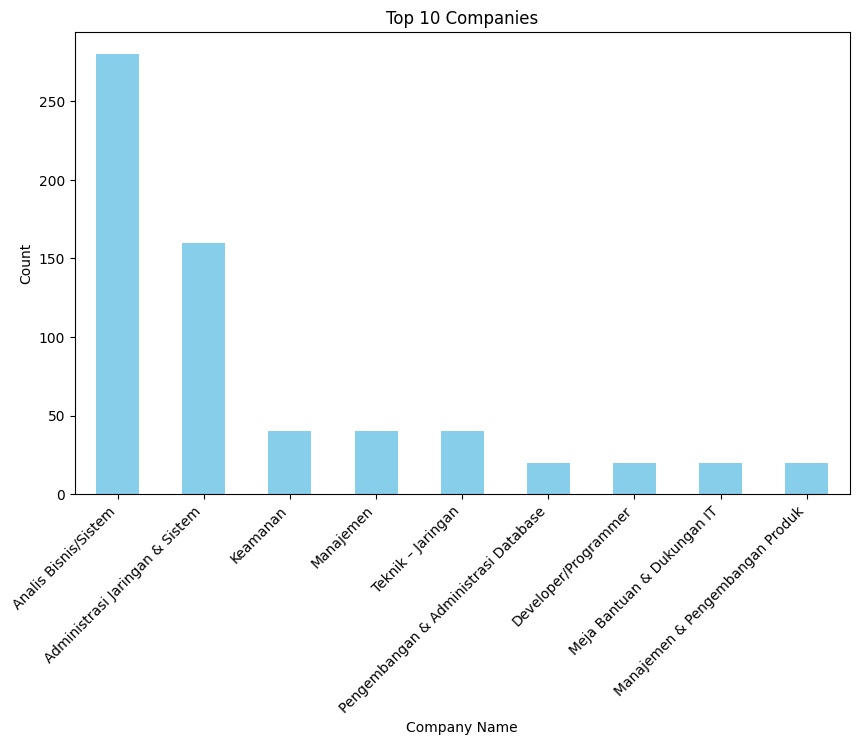

In [11]:
top_companies = result_df['subcategory'].value_counts()[:10]

# Plotting
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

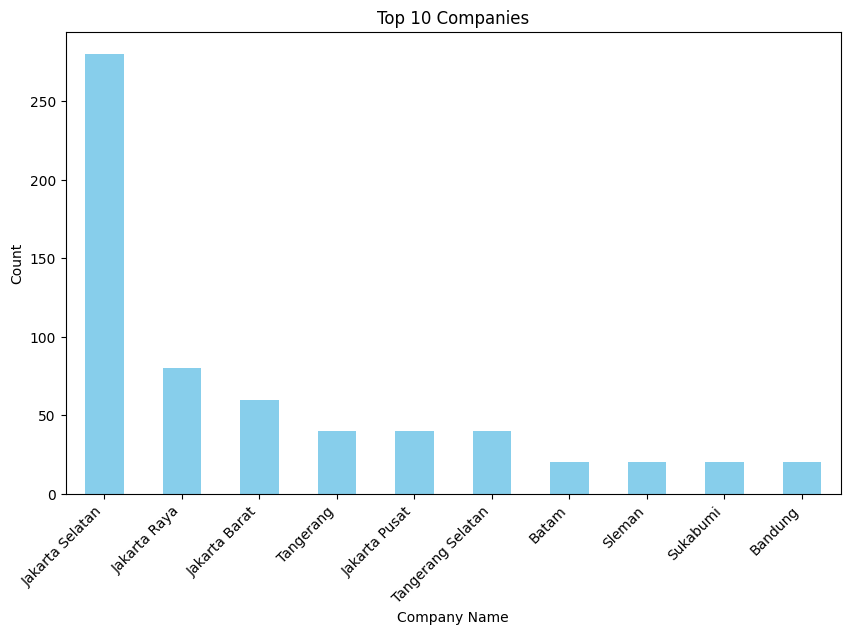

In [13]:
top_companies = result_df['location'].value_counts()[:10]

# Plotting
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='Job Description length', ylabel='No. of jobs'>

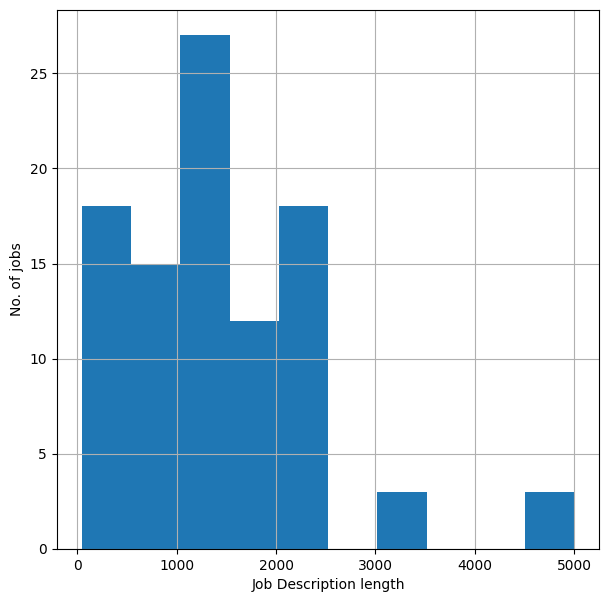

: 

In [41]:
# visualizing Job Description length
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.xlabel("Job Description length")
plt.ylabel("No. of jobs")

result_df['descriptions'].str.len().hist()